# Projet ML
GAUD - CURRAL - GALMIER

## Libraries

### Installation

In [21]:
! pip install tensorflow

### Import

In [22]:
import numpy as np
import tensorflow as tf
from glob import glob
from tensorflow import audio

import numpy as np
# import required modules 
import os

### Variables

In [23]:
TRAIN_DATA_PATH = r'.\Data\test'

# Code

In [37]:
from os import listdir

foldersInTest = list(listdir(TEST_DATA_PATH))
print(foldersInTest)

['Asian Koel', 'Black Kite', 'Black-breasted Parrotbill', 'Black-necked crane', 'Bristled Grassbird', 'Cheer Pheasant', 'Common Cuckoo', 'Common Pochard', 'Common Wood Pigeon', 'Eastern Imperial Eagle', 'Egyptian Vulture', 'Great Slaty Woodpecker', 'Greater Spotted Eagle', 'Grey Treepie', 'Grey-crowned Prinia', 'Grey-sided Thrush', 'Himalayan Monal', 'House Crow', 'House Sparrow', 'Indian Spotted Eagle', 'Jerdon_s Babbler', 'Kashmir Flycatcher', 'Large-billed Crow', 'Long-tailed Duck', 'Pallas_s Fish Eagle', 'Red-billed Blue Magpie', 'Rose-ringed Parakeet', 'Rufous Treepie', 'Rufous-necked Hornbill', 'Rustic Bunting', 'Saker Falcon', 'Sarus Crane', 'Satyr Tragopan', 'Slender-billed Babbler', 'Spiny Babbler', 'Spotted Dove', 'Steppe Eagle', 'Swamp Francolin', 'Swamp Grass-babbler', 'White-throated Bushchat', 'Wood Snipe']


In [25]:
fileLabeled = {}

for folderName in foldersInTest:
    PATH_TO_FOLDER = os.path.join(TEST_DATA_PATH, folderName)

    filesInFolder = listdir(PATH_TO_FOLDER)
    
    for fileNameWav in filesInFolder:
        splitName = fileNameWav.split('.')
        fileLabeled[splitName[0]] = folderName
        
print(fileLabeled)

{'XC161198 1': 'Asian Koel', 'XC162828 0': 'Asian Koel', 'XC179229 8': 'Asian Koel', 'XC182810 0': 'Asian Koel', 'XC196583 0': 'Asian Koel', 'XC196584 1': 'Asian Koel', 'XC236515 1': 'Asian Koel', 'XC311271 0': 'Asian Koel', 'XC314339 1': 'Asian Koel', 'XC327430 1': 'Asian Koel', 'XC327430 2': 'Asian Koel', 'XC332698 1': 'Asian Koel', 'XC359129 0': 'Asian Koel', 'XC365421 0': 'Asian Koel', 'XC369205 0': 'Asian Koel', 'XC369205 2': 'Asian Koel', 'XC412822 1': 'Asian Koel', 'XC416848 original': 'Asian Koel', 'XC426536 7': 'Asian Koel', 'XC446387 10': 'Asian Koel', 'XC454504 0': 'Asian Koel', 'XC461162 0': 'Asian Koel', 'XC461634 original': 'Asian Koel', 'XC531612 1': 'Asian Koel', 'XC576721 8': 'Asian Koel', 'XC578005 original': 'Asian Koel', 'XC591315 3': 'Asian Koel', 'XC591315 5': 'Asian Koel', 'XC594949 1': 'Asian Koel', 'XC594949 23': 'Asian Koel', 'XC594949 4': 'Asian Koel', 'XC594949 42': 'Asian Koel', 'XC594949 43': 'Asian Koel', 'XC594951 0': 'Asian Koel', 'XC635320 0': 'Asian K

In [39]:
testFileNames = tf.random.shuffle(glob(TEST_DATA_PATH+'\\*\\*'))

In [40]:
allTestFiles = tf.io.read_file(testFileNames[0])

In [41]:
test_audio, samplerate = tf.audio.decode_wav(contents=allTestFiles)

In [42]:
def decode_audio(audio_binary):
    audio, _ = tf.audio.decode_wav(contents=audio_binary)
    return tf.squeeze(audio, axis=-1)

In [43]:
import os


def get_label_from_filepath(file_path):

    parts = tf.strings.split(input=file_path, sep=os.path.sep)
    print(parts[-2])
    return parts[-2]

In [44]:
t = get_label_from_filepath(allTestFiles)
print(type(t))
print(t.numpy())

tf.Tensor(b"\xffC\x00\xc1\xffv\x00s\x00\x1c\x00j\x00\x1d\x00J\x00\x08\x00\xb9\xffd\xffk\xff\x85\xff\xfd\xff\x81\x00\xe4\xffL\x00\x9c\xff\xcd\xff\xc2\xff\x99\x00B\xff\xf6\x00\x11\xff\xa3\x00\x91\xffs\x00\xc5\xff\xd2\xffH\x00l\xff\xda\x00A\xfft\x00\x14\xff\xe6\xff\xcb\xffY\x00\xdb\xff\xfe\x00a\xffb\x00\x82\x00\x8f\xff\x03\x01\xbf\xff\x1b\x00\x0f\x001\x001\x00\x92\x00\xd5\xff\x82\x00o\xff?\x00\x82\x00\xa2\xff\x13\x01\xc3\xff*\x00\xe8\xff\x1b\x00i\xff'\x00\xf7\xff\xdc\xffH\x00D\x00\x9c\xff:\x00L\x00\x07\x000\x01#\x00\x9e\x00\xea\xff\xf5\xff\x1f\x00Z\xff8\x00\xf2\xfe\xf8\xff\x7f\xff!\x00.\x00\xce\xff\xb8\x00\xb1\xff%\x01\xd3\xff\x97\x00'\xff\x84\xff\xaa\xff\x1d\xff\x8a\x00\xb0\xff\xfc\xffi\x00&\x00\x03\x00Y\x00j\xff\xbe\xff\xcc\xff\x06\x00\xcf\xff\xd7\xff\x8d\xff\x83\xff\x1d\x00G\x00?\x00\xcf\xff\xef\xff<\xff\t\x00<\x00\xd8\xff\x0f\x00\xd0\xffR\xff\x18\x00\xeb\xff\n\x00\xcd\xff\x7f\x00_\xff\x92\x00@\x00u\xffe\x00\x95\xff\xec\xff\xae\x00\x80\x00\x84\x00\x0b\x00\xe0\xff\xd9\xfe\xb7\xff\xa5\xf

In [45]:
def get_waveform_and_label(file_path):
    print(t.numpy())
    label = get_label_from_filepath(file_path)
    audio_binary = tf.io.read_file(file_path)
    waveform = decode_audio(audio_binary)
    return waveform, label

In [46]:
AUTOTUNE = tf.data.AUTOTUNE

In [49]:
es_ds = tf.data.Dataset.from_tensor_slices(train_files)

NameError: name 'train_files' is not defined

In [ ]:
waveform_ds = files_ds.map(map_func=get_waveform_and_label, num_parallel_calls=AUTOTUNE)

NameError: name 'waveform_ds' is not defined

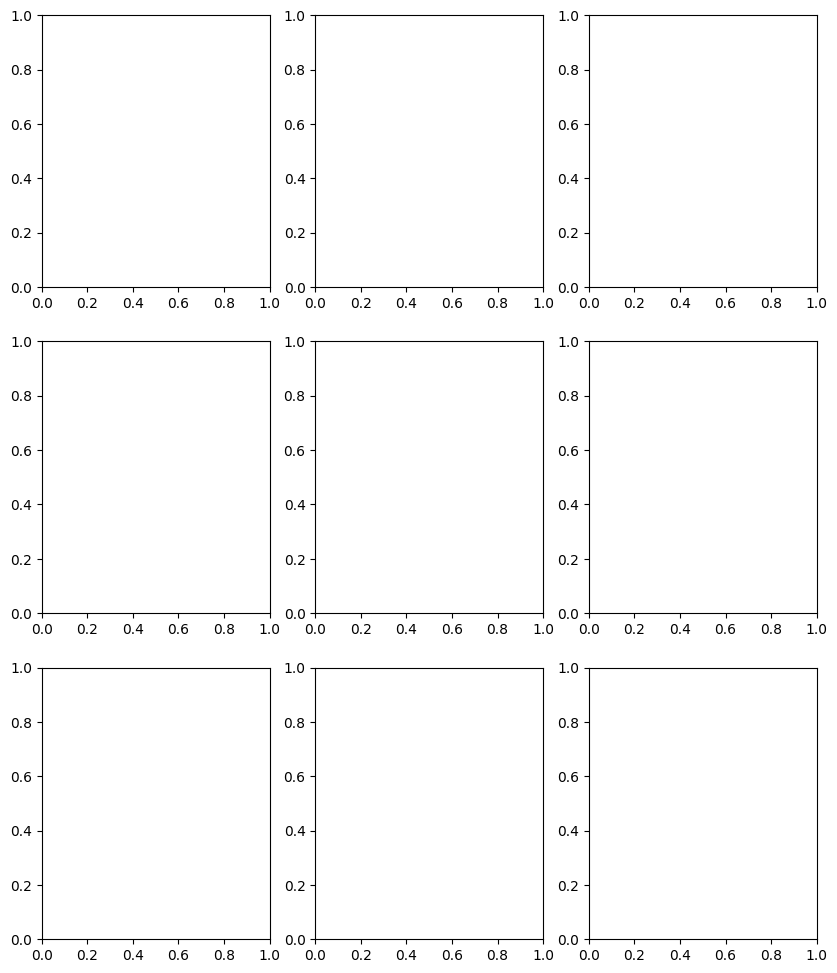

In [48]:
import matplotlib.pyplot as plt
import numpy as np

rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(audio.numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label.numpy().decode("utf-8")
    ax.set_title(label)

plt.show()